In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('all_requests.csv')
# boarding_cat_df = pd.read_csv('2026-02-08T09-17_export_boarding_category.csv')

In [3]:
df.head()

,ID,Conversation ID,Message ID,User ID,Model,Timestamp,Status,Request,Response,Prompt Tokens,Completion Tokens,Total Tokens,Cost,Latency,User Feedback,Cache Hit,Clarification
0,84448,523e4c3d-89b2-40a5-b98b-77e92baa6964,de56f744366d51bd8499eab40c3f76011f2aa7152ee6e3...,default_user,openai.gpt-oss-120b-1:0,"05/02/2026, 09:20:02",success,Registration steps,## Digi Yatra Registration – Step‑by‑Step \n\...,1809,482,2291,0.000975,1.485910,NaN,True,[{'question': 'Which registration part do you ...
1,84444,523e4c3d-89b2-40a5-b98b-77e92baa6964,91c59715c5ed04ff9e65784e17c105d9747f1250c0ca58...,default_user,openai.gpt-oss-120b-1:0,"05/02/2026, 09:18:29",success,What is DigiYatra?,## DigiYatra Overview\n\n- **What it is**: A n...,1508,296,1804,0.000738,0.785191,NaN,True,[{'question': 'What aspect of DigiYatra are yo...
2,84447,2d76e419-058b-4126-944a-254cf25fd24d,61a2ae6d92502654d1de04e7221f9996ff0205371acee4...,default_user,openai.gpt-oss-120b-1:0,"05/02/2026, 09:20:01",success,How do I add a child/dependent to my DigiYatra...,please contact support at [customercare@digiya...,555,99,654,0.000265,0.002740,NaN,True,[{'question': 'How can I assist with adding a ...
3,84446,062a93a6-3c04-4907-9a89-b5b714ffd267,12d732ac8dbc13ed6b91ee4bdd17ab27b21cfb5946110d...,default_user,openai.gpt-oss-120b-1:0,"05/02/2026, 09:19:52",success,Airport entry and security steps,## Airport Entry (DigiYatra E‑Gate)\n\n1. **Sc...,2002,305,2307,0.000917,3.595781,NaN,False,[{'question': 'Which airport step would you li...
4,84445,062a93a6-3c04-4907-9a89-b5b714ffd267,3e6ca78ff6c323d0f64621c4c54405fccd20c79efe6e53...,default_user,openai.gpt-oss-120b-1:0,"05/02/2026, 09:19:38",success,How do I check in for a flight using DigiYatra?,## Checking‑in with DigiYatra\n\n1. **Download...,1523,468,1991,0.000865,2.821501,NaN,False,[{'question': 'How can I assist you with DigiY...


In [4]:
df.shape

(84452, 17)

In [5]:
df['User ID'].value_counts(), df['ID'].value_counts()

(User ID
 default_user    84452
 Name: count, dtype: int64,
 ID
 64702    2
 64705    2
 57350    2
 43531    2
 28143    1
         ..
 56302    1
 56304    1
 56297    1
 56305    1
 56294    1
 Name: count, Length: 84448, dtype: int64)

In [38]:
idx = 100

for i in range(idx):
    print(df['Clarification'][i])

[{'question': 'Which registration part do you need help with?', 'options': ['New user setup', 'Existing account issues', 'Document verification', 'App download']}, {'question': 'Can I assist you with anything else?', 'options': ['How it works', 'Supported airports', 'Benefits', 'Requirements']}]
[{'question': 'What aspect of DigiYatra are you interested in?', 'options': ['How it works', 'Benefits', 'Supported airports', 'Eligibility requirements']}, {'question': 'Can I help you with anything else?', 'options': ['Registration steps', 'Airport check‑in process', 'App troubleshooting']}]
[{'question': 'How can I assist with adding a dependent?', 'options': ['Step‑by‑step guide', 'Required document verification', 'Finding the option in the app', 'Updating account settings']}, {'question': 'Anything else you’d like help with today?', 'options': ['New user registration', 'Airport check‑in process', 'App technical issue', 'General DigiYatra info']}]
[{'question': 'Which airport step would you

In [7]:
df.columns, len(df.columns)

(Index(['ID', 'Conversation ID', 'Message ID', 'User ID', 'Model', 'Timestamp',
        'Status', 'Request', 'Response', 'Prompt Tokens', 'Completion Tokens',
        'Total Tokens', 'Cost', 'Latency', 'User Feedback', 'Cache Hit',
        'Clarification'],
       dtype='object'),
 17)

In [8]:
df.dtypes

ID                     int64
Conversation ID       object
Message ID            object
User ID               object
Model                 object
Timestamp             object
Status                object
Request               object
Response              object
Prompt Tokens          int64
Completion Tokens      int64
Total Tokens           int64
Cost                 float64
Latency              float64
User Feedback         object
Cache Hit               bool
Clarification         object
dtype: object

In [9]:
df['Model'].unique()

array(['openai.gpt-oss-120b-1:0',
       'anthropic.claude-3-sonnet-20240229-v1:0'], dtype=object)

In [10]:
df['Model'].value_counts(), df['Status'].value_counts()

(Model
 anthropic.claude-3-sonnet-20240229-v1:0    80118
 openai.gpt-oss-120b-1:0                     4334
 Name: count, dtype: int64,
 Status
 success    84452
 Name: count, dtype: int64)

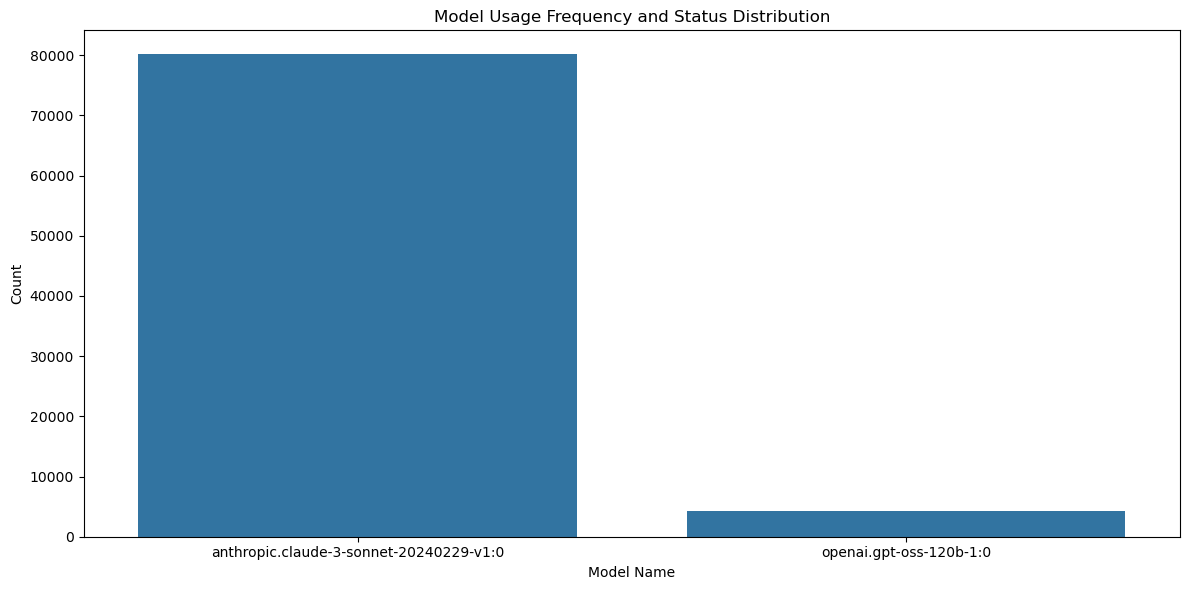

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the DataFrame containing the generated responses and has 'model' and 'status' columns
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Model', order=df['Model'].value_counts().index)
plt.title('Model Usage Frequency and Status Distribution')
plt.xlabel('Model Name')
plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [15]:
import plotly.express as px
import pandas as pd

# Ensure Timestamp is datetime and sorted chronologically
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)
df = df.sort_values('Timestamp')

# 1. Separate plots for each model type using facets
fig1 = px.line(
    df, 
    x='Timestamp', 
    y='Cost', 
    color='Model', 
    facet_col='Model', 
    facet_col_wrap=2,
    markers=True,
    title='Monthly Cost Trend per Model Type'
)
fig1.update_xaxes(tickangle=45)
fig1.show()

# 2. Separate plot for monthly wise ascending (Total Cost across all models)
monthly_df = df.groupby(df['Timestamp'].dt.to_period('M'))['Cost'].sum().reset_index()
monthly_df['Timestamp'] = monthly_df['Timestamp'].dt.to_timestamp()

fig2 = px.line(
    monthly_df, 
    x='Timestamp', 
    y='Cost', 
    markers=True,
    title='Total Monthly Cost (Min Date to Max Date)',
    labels={'Timestamp': 'Month', 'Cost': 'Total Cost (USD)'}
)
fig2.update_xaxes(tickangle=45)
fig2.show()


In [26]:
df['User Feedback'].value_counts()

User Feedback
{"rating": "good", "comments": ""}                                                                                                                                                    23
{"rating": "bad", "comments": ""}                                                                                                                                                      7
{"rating": "good", "comments": "Thanks "}                                                                                                                                              2
{"rating": "good", "comments": "Good."}                                                                                                                                                2
{"rating": "bad", "comments": "I hv a boarding pass. Where is the upload to airport slot"}                                                                                             1
{"rating": "bad", "comments": "Didnt get any helpb"}         

In [18]:
qna_feeback_df = df[['Request', 'Response', 'User Feedback']]

In [30]:
qna_feeback_df

,Request,Response,User Feedback
0,Registration steps,## Digi Yatra Registration – Step‑by‑Step \n\...,NaN
1,What is DigiYatra?,## DigiYatra Overview\n\n- **What it is**: A n...,NaN
2,How do I add a child/dependent to my DigiYatra...,please contact support at [customercare@digiya...,NaN
3,Airport entry and security steps,## Airport Entry (DigiYatra E‑Gate)\n\n1. **Sc...,NaN
4,How do I check in for a flight using DigiYatra?,## Checking‑in with DigiYatra\n\n1. **Download...,NaN
...,...,...,...
84447,DigiYatra is available at how many airports?,"Unfortunately, I do not have specific informat...",NaN
84448,what is digiyatra,**Digi Yatra** is a Ministry of Civil Aviation...,NaN
84449,kya offfer chal rahe hain ?,"मुझे डिजि यात्रा सेवाओं, पंजीकरण या उपयोग के ब...",NaN
84450,What is DigiYatra?,"**DigiYatra** is a Ministry of Civil Aviation,...",NaN


In [39]:
df.iloc[16146]['Response']

"If you need to retrieve a previous boarding pass that was uploaded to the DigiYatra app, here are a few suggestions:\n\n- The app stores your recent boarding pass uploads for a limited time period. Check the 'Recent' or 'Past Trips' section to see if the boarding pass you need is still available there.\n\n- If not found in the app, you can try retrieving the boarding pass from your email inbox, especially if you received it as an e-boarding pass from the airline. \n\n- Most airlines also provide an option to retrieve past boarding passes by logging into your account on their website or mobile app. Look for a 'Past Travel' or similar section.\n\n- As a last resort, you can reach out to the airline's customer support with your travel details (flight number, date, PNR etc.) and request them to resend the boarding pass to your email.\n\nHowever, if you are unable to find the previous boarding pass through any of these methods, you will likely need to re-upload the latest boarding pass for

In [31]:
# Filter rows where User Feedback is not NaN/empty
feedback_df = df[df['User Feedback'].notna() & (df['User Feedback'] != '')]

# Display
print(f"Total rows with feedback: {len(feedback_df)}")
feedback_df

Total rows with feedback: 83


,ID,Conversation ID,Message ID,User ID,Model,Timestamp,Status,Request,Response,Prompt Tokens,Completion Tokens,Total Tokens,Cost,Latency,User Feedback,Cache Hit,Clarification
198,84250,0ce82f3b-cfad-48d5-8edc-94d3e4091d17,2be62c42c9270c2a628a63b44123ad049188f5ecce5f49...,default_user,openai.gpt-oss-120b-1:0,"05/02/2026, 03:51:43",success,Stepbystep upload guide,**Step‑by‑Step Upload Guide**\n\nThe current D...,822,100,922,0.000359,1.274982,"{""rating"": ""bad"", ""comments"": ""I hv a boarding...",False,[{'question': 'Which upload step do you need h...
1663,82785,0bbe5c3b-1f66-4b20-abc4-aeac87551d1d,ea4f0aa6a8fca416048628c014cfac69a68b38f4cc558c...,default_user,openai.gpt-oss-120b-1:0,"03/02/2026, 02:02:34",success,QR code scanning,please contact support at [customercare@digiya...,1284,57,1341,0.000490,1.710043,"{""rating"": ""bad"", ""comments"": ""Not helpful ""}",False,[{'question': 'Which QR code scanning step do ...
2164,82284,0231fe49-931a-4521-b9e5-463a1acf4189,4cb9309a029bd26c5d2024bad0f17b80c50320db2a80d7...,default_user,openai.gpt-oss-120b-1:0,"02/02/2026, 06:50:52",success,Works,Glad to hear it’s working now! 🎉 \n\nIf you n...,778,70,848,0.000322,2.271855,"{""rating"": ""good"", ""comments"": ""Its good ""}",False,[{'question': 'How can I assist you with DigiY...
6358,78090,1aeaa993-ca0b-4e19-9b23-83bccff42d15,5fd2b7851906c3ef709818ab664e4a655171ab8c1f6532...,default_user,anthropic.claude-3-sonnet-20240229-v1:0,"26/01/2026, 16:28:34",success,Window,"Unfortunately, the context provided does not c...",1434,230,1664,0.007752,3.316274,"{""rating"": ""bad"", ""comments"": ""Didnt get any h...",False,[]
11276,73172,3219414f-cda5-4ada-97ed-a5633c9a3e7b,d36937b3a8425c9ff51505ea311883a9d2b56397b9c988...,default_user,anthropic.claude-3-sonnet-20240229-v1:0,"19/01/2026, 07:19:15",success,What documents are required for aircraft regis...,I don't have specific information about the do...,538,65,603,0.002589,3.023938,"{""rating"": ""good"", ""comments"": """"}",False,[{'question': 'For aircraft registration with ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84263,189,f8ba96b7-9795-46d3-b6b0-ad7c7add1be1,b3a45c3014dcfe149366a85392986981ea0285277e1192...,default_user,anthropic.claude-3-sonnet-20240229-v1:0,"28/08/2025, 09:17:36",success,What is the security procedure for gate entry ...,Here are the steps for secure gate entry using...,1763,213,1976,0.008484,2.936505,"{""rating"": ""good"", ""comments"": """"}",False,[{'question': 'Let me explain the security pro...
84267,185,95549a2c-a4c0-421b-916e-63a395d563bd,3a8f2a0b024ce95f9c82f461d6d44e9dd474639d21a1e4...,default_user,anthropic.claude-3-sonnet-20240229-v1:0,"28/08/2025, 05:15:47",success,What Civil Aviation Requirements govern aircra...,The Civil Aviation Requirements (CARs) that go...,1763,304,2067,0.009849,3.912275,"{""rating"": ""bad"", ""comments"": """"}",False,[{'question': 'What are the main areas covered...
84268,184,9b28a561-0161-4f29-b86e-ecfead9a61bf,7d28836abf3400e59757c58dd13765768dba08b6ea2f4a...,default_user,anthropic.claude-3-sonnet-20240229-v1:0,"28/08/2025, 05:15:13",success,How does DigiYatra work at the departure gate?,Here are the steps for using DigiYatra at the ...,1761,175,1936,0.007908,2.995590,"{""rating"": ""good"", ""comments"": """"}",False,[{'question': 'Let me know if you need help un...
84286,166,42eb2234-aa4d-4430-ad63-0a3075cd0f7c,7b058bcb4825d29119f962db1543906be2ce3609834111...,default_user,anthropic.claude-3-sonnet-20240229-v1:0,"25/08/2025, 08:45:07",success,What is the security procedure for departure g...,Here are the steps for departure gate entry us...,1779,173,1952,0.007932,3.357249,"{""rating"": ""good"", ""comments"": """"}",False,[{'question': 'What should I do at the departu...


In [45]:
feedback_df['Cache Hit'].value_counts()

Cache Hit
False    71
True     12
Name: count, dtype: int64

In [32]:
feedback_df[['Timestamp', 'Request', 'Response', 'User Feedback']].head(50)

,Timestamp,Request,Response,User Feedback
198,"05/02/2026, 03:51:43",Stepbystep upload guide,**Step‑by‑Step Upload Guide**\n\nThe current D...,"{""rating"": ""bad"", ""comments"": ""I hv a boarding..."
1663,"03/02/2026, 02:02:34",QR code scanning,please contact support at [customercare@digiya...,"{""rating"": ""bad"", ""comments"": ""Not helpful ""}"
2164,"02/02/2026, 06:50:52",Works,Glad to hear it’s working now! 🎉 \n\nIf you n...,"{""rating"": ""good"", ""comments"": ""Its good ""}"
6358,"26/01/2026, 16:28:34",Window,"Unfortunately, the context provided does not c...","{""rating"": ""bad"", ""comments"": ""Didnt get any h..."
11276,"19/01/2026, 07:19:15",What documents are required for aircraft regis...,I don't have specific information about the do...,"{""rating"": ""good"", ""comments"": """"}"
11290,"19/01/2026, 06:52:58",Hi,Hello! Welcome to the DigiYatra virtual assist...,"{""rating"": ""good"", ""comments"": ""Super ""}"
12812,"17/01/2026, 06:42:03",Sir can I upload driving licence and voter's i...,"No, for DigiYatra enrollment you cannot upload...","{""rating"": ""good"", ""comments"": ""Thanks ""}"
13127,"16/01/2026, 17:49:22",Let me try,"Okay, sounds good. Go ahead and try the troubl...","{""rating"": ""good"", ""comments"": ""Great...""}"
13681,"16/01/2026, 03:36:42",I am not issued a boarding pass for internatio...,"No, you cannot upload an e-ticket or any docum...","{""rating"": ""good"", ""comments"": ""Thanks for the..."
14694,"14/01/2026, 18:40:34","So my name is First middle last in passport , ...","Yes, the name mismatch between your Aadhaar an...","{""rating"": ""good"", ""comments"": ""Awesome , real..."


In [43]:
feedback_df.loc[16146]['User Feedback']

'{"rating": "bad", "comments": "Need previous journey boarding pass "}'

1. Sentiment analysis for the user feedback, and the multiligual requests 
2. Security anlaysis of the user requests - anlayzing Harmful contents w.r.t time,  Guardrail layer
3. 